<a href="https://colab.research.google.com/github/YeKyawSoe/DSM020/blob/main/DSM020_Presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Module**: Data Programming in Python DSM020-2021-APR
### *Coursework: Apr 2021*

## Group-2 Teamwork - Excercise 20/May/2021
### Team Members: Pei Xuan, Bin Bin, Michael, Ashok


# New section

#Study & Analysis on the key impact of household electricty consumption due to COVID-19 (before & during pandemic)
According to Today 14 May 2021, due to the increasing number of community cases, Singapore will be entering Phase 2 (Heightened Alert) from 16 May - 13 Jun 2021. In this new phase, dining-in is prohibited and only takeaway and delivery are allowed. In addition, work arrangements will resume to "working-from-home" as the default arrangement. With these measures that shift most of the daily activities to be confined within the home environment, it is inevitable that we would think about the possible increase in utilities bill.

In this project, we would like to study if the Covid-19 situation has **affected the trend of the household electricity consumption in Singapore**. For the purpose of this project, we are focusing on the electricity consumption for the 3-room and 4-room housing types.



```
# This is formatted as code
```

### Common libraries import for data processing & analysis

In [ ]:
import pandas as pd
import numpy as np
import requests
import json
from pandas import json_normalize


### **1.Reading/Scraping the dataset**

The dataset that we are going to use for this group excercise is shared and made available at this Github link.

Let's first see how the dataset looks like using the head() method:

In [ ]:
# GET request for Covid dataset

url_c = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

covid_daily = pd.read_csv(url_c)

In [ ]:
# GET request for Electricity dataset

parameters_e = {"resource_id": "4feb82a2-0d2e-4e8a-bc74-dd8c0c960af8", "q": 2020, "limit": 7}
url_e = 'https://data.gov.sg/api/action/datastore_search'

response_e = requests.get(url_e, params= parameters_e)
dict_e = response_e.json()
rec_e = dict_e['result']['records']

electricity_monthly = json_normalize(rec_e)

In [ ]:
# GET request for Temperature dataset

parameters_t = {"resource_id": "07654ce7-f97f-49c9-81c6-bd41beba4e96", "q": 2020, "limit": 12}
url_t = 'https://data.gov.sg/api/action/datastore_search'

response_t = requests.get(url_t, params= parameters_t)
dict_t = response_t.json()
rec_t = dict_t['result']['records']

temperature_monthly = json_normalize(rec_t)

In [ ]:
# GET request for Humidity dataset

parameters_h = {"resource_id": "4631174f-9858-463d-8a88-f3cb21588c67", "q": 2020, "limit": 12}
url_h = 'https://data.gov.sg/api/action/datastore_search'

response_h = requests.get(url_h, params= parameters_h)
dict_h = response_h.json()
rec_h = dict_h['result']['records']

humidity_monthly = json_normalize(rec_h)

**Coronavirus Pandemic Country Profile (Covid) - upto Dec'2020**

In [ ]:
covid_daily.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


**Observations:**
- The dataset contains data for locations outside of Singapore, which is not relevant to our analysis in this project. We will only need data for Singapore.
- We are only interested in the number of new cases, so we will be using **'new_cases'** column for our analysis.
- The dataset has a **daily** time period, which is something that we need to process before we merge with the dataset on electricity consumption, which has a **monthly** time period.
- The time period that we use for this dataset will have to correspond with the electricity consumption dataset (i.e. 2020).

**Household Electricity Consumption by Dwelling Type - Monthly Mean**

In [ ]:
electricity_monthly.head(5)


,landed_properties,_full_count,private_housing,4-room,3-room,overall,rank,month,public_housing,5-room_and_executive,others,_id,1-room_2-room,private_apts_and_condo
0,1072.4,14,572.1,324.5,239.6,384.3,0.057309,2020-01,310.5,388.7,676,31,146.4,459.5
1,1157.9,14,607.7,341.1,252.5,406.7,0.057309,2020-02,327.7,413.5,741.2,32,151,484.3
2,1184.7,14,640.6,348.6,255.8,420.9,0.057309,2020-03,334.7,425.6,714.2,33,150.7,518.4
3,1290.7,14,689,377.3,275.2,453.3,0.057309,2020-04,360.9,458.7,825.4,34,160.3,554.2
4,1277.9,14,681.7,377.7,278.7,450.9,0.057309,2020-05,360.7,453.5,881.2,35,165.9,547.4


**Surface Air Temperature - Monthly Mean**

In [ ]:
temperature_monthly.head(5)

,mean_temp,_id,_full_count,rank,month
0,27.7,457,12,0.057309,2020-01
1,27.9,458,12,0.057309,2020-02
2,28.6,459,12,0.057309,2020-03
3,28.9,460,12,0.057309,2020-04
4,28.9,461,12,0.057309,2020-05


**Relative Humidity - Monthly Mean**

In [ ]:
humidity_monthly.head(5)

,mean_rh,_id,_full_count,rank,month
0,77.9,457,12,0.057309,2020-01
1,76,458,12,0.057309,2020-02
2,75.2,459,12,0.057309,2020-03
3,76.4,460,12,0.057309,2020-04
4,79.1,461,12,0.057309,2020-05


### **2. Cleaning the data**

**COVID Dataset**

**Extracting data for Singapore only**

In [ ]:
covid_sg_daily = covid_daily[covid_daily["location"] == "Singapore"]
covid_sg_daily.head(2)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
72064,SGP,Asia,Singapore,2020-01-23,1.0,1.0,NaN,NaN,NaN,NaN,0.171,0.171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,5850343.0,7915.731,42.4,12.922,7.049,85535.383,NaN,92.243,10.99,5.2,28.3,NaN,2.4,83.62,0.938
72065,SGP,Asia,Singapore,2020-01-24,3.0,2.0,NaN,NaN,NaN,NaN,0.513,0.342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,5850343.0,7915.731,42.4,12.922,7.049,85535.383,NaN,92.243,10.99,5.2,28.3,NaN,2.4,83.62,0.938


**Extracting data for Year 2020**

In [ ]:
covid_sg_daily_2020 = covid_sg_daily[covid_sg_daily["date"].str.contains('2020')]
covid_sg_daily_2020.head(2)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
72064,SGP,Asia,Singapore,2020-01-23,1.0,1.0,NaN,NaN,NaN,NaN,0.171,0.171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,5850343.0,7915.731,42.4,12.922,7.049,85535.383,NaN,92.243,10.99,5.2,28.3,NaN,2.4,83.62,0.938
72065,SGP,Asia,Singapore,2020-01-24,3.0,2.0,NaN,NaN,NaN,NaN,0.513,0.342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,5850343.0,7915.731,42.4,12.922,7.049,85535.383,NaN,92.243,10.99,5.2,28.3,NaN,2.4,83.62,0.938


**Extracting data for relevant columns**

In [ ]:
covid_sg_daily_2020 = covid_sg_daily_2020.loc[:][['date', 'new_cases']]
covid_sg_daily_2020.head(2)

,date,new_cases
72064,2020-01-23,1.0
72065,2020-01-24,2.0


In [ ]:
# Checking for null values
covid_sg_daily_2020.isnull().sum()

date         0
new_cases    0
dtype: int64

**Finding average of new cases per month**

In [ ]:
import datetime as dt

# Creating an empty dictionary for month as key and mean new cases as value.
covid_sg_monthly_2020_dict = {}

    
# Creating a for loop to calculate the mean new cases for each month.
for i in range(0,9):
    dt_string = "{}-0{}".format(2020, i+1)
    month_df = covid_sg_daily_2020[covid_sg_daily_2020['date'].str.contains(dt_string)]
    new_cases_mean = month_df['new_cases'].mean()
    dt_object = dt.datetime(2020, i+1, 1)
    dt_month = dt_object.strftime("%Y-%m")
    
    if dt_month not in covid_sg_monthly_2020_dict:
        covid_sg_monthly_2020_dict[dt_month] = new_cases_mean
        
for i in range(9,12):
    dt_string = "{}-{}".format(2020, i+1)
    month_df = covid_sg_daily_2020[covid_sg_daily_2020['date'].str.contains(dt_string)]
    new_cases_mean = month_df['new_cases'].mean()
    dt_object = dt.datetime(2020, i+1, 1)
    dt_month = dt_object.strftime("%Y-%m")
    
    if dt_month not in covid_sg_monthly_2020_dict:
        covid_sg_monthly_2020_dict[dt_month] = new_cases_mean

# Converting dictionary to DataFrame and renaming columns.
covid_sg_monthly_2020 = pd.DataFrame.from_dict(covid_sg_monthly_2020_dict, orient='index', columns=["mean_new_covid_cases"])
covid_sg_monthly_2020['month'] = covid_sg_monthly_2020.index
covid_sg_monthly_2020 = covid_sg_monthly_2020[['month', 'mean_new_covid_cases']]

# Resetting the index and renaming dataframe
covid_clean = covid_sg_monthly_2020.reset_index(drop=True)

covid_clean

,month,mean_new_covid_cases
0,2020-01,1.444444
1,2020-02,3.068966
2,2020-03,26.580645
3,2020-04,508.100000
4,2020-05,603.709677
5,2020-06,300.766667
6,2020-07,267.677419
7,2020-08,148.612903
8,2020-09,31.766667
9,2020-10,8.064516


**Electricity Consumption Dataset**

In [ ]:
# Checking for null values
electricity_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   landed_properties       7 non-null      object 
 1   _full_count             7 non-null      object 
 2   private_housing         7 non-null      object 
 3   4-room                  7 non-null      object 
 4   3-room                  7 non-null      object 
 5   overall                 7 non-null      object 
 6   rank                    7 non-null      float64
 7   month                   7 non-null      object 
 8   public_housing          7 non-null      object 
 9   5-room_and_executive    7 non-null      object 
 10  others                  7 non-null      object 
 11  _id                     7 non-null      int64  
 12  1-room_2-room           7 non-null      object 
 13  private_apts_and_condo  7 non-null      object 
dtypes: float64(1), int64(1), object(12)
memory usa

Dataset has no null values.

In [ ]:
# Extracting data for Year 2020
electricity_monthly_2020 = electricity_monthly[electricity_monthly['month'].str.contains('2020')]

# Removing categorical columns and rearranging columns
electricity_monthly_2020.drop(["_id",'_full_count','rank'], axis=1, inplace=True)
electricity_monthly_2020 = electricity_monthly_2020[['month','overall','public_housing','private_housing','1-room_2-room','3-room','4-room','5-room_and_executive','private_apts_and_condo','landed_properties']]


# Resetting the index and renaming the dataframe
electricity_clean = electricity_monthly_2020.reset_index(drop=True)

electricity_clean

,month,overall,public_housing,private_housing,1-room_2-room,3-room,4-room,5-room_and_executive,private_apts_and_condo,landed_properties
0,2020-01,384.3,310.5,572.1,146.4,239.6,324.5,388.7,459.5,1072.4
1,2020-02,406.7,327.7,607.7,151,252.5,341.1,413.5,484.3,1157.9
2,2020-03,420.9,334.7,640.6,150.7,255.8,348.6,425.6,518.4,1184.7
3,2020-04,453.3,360.9,689,160.3,275.2,377.3,458.7,554.2,1290.7
4,2020-05,450.9,360.7,681.7,165.9,278.7,377.7,453.5,547.4,1277.9
5,2020-06,591,473.6,891.9,207.6,359.3,493.3,607.3,754.2,1503
6,2020-07,601.1,486,894.9,215.5,360.3,507,628.6,767.1,1466.1


**Surface Air Temperature Dataset**

In [ ]:
# Extracting data for Year 2020
temperature_monthly_2020 = temperature_monthly[temperature_monthly['month'].str.contains('2020')]

# Resetting the index and renaming the dataframe
temperature_clean = temperature_monthly_2020[["month","mean_temp"]].reset_index(drop=True)

temperature_clean

,month,mean_temp
0,2020-01,27.7
1,2020-02,27.9
2,2020-03,28.6
3,2020-04,28.9
4,2020-05,28.9
5,2020-06,28.1
6,2020-07,27.9
7,2020-08,28.3
8,2020-09,27.5
9,2020-10,28.3


**Relative Humidity Dataset**

In [ ]:
# Extracting data for Year 2020
humidity_monthly_2020 = humidity_monthly[humidity_monthly['month'].str.contains('2020')]

# Resetting the index and renaming the dataframe
humidity_clean = humidity_monthly_2020[['month','mean_rh']].reset_index(drop=True)

humidity_clean

,month,mean_rh
0,2020-01,77.9
1,2020-02,76
2,2020-03,75.2
3,2020-04,76.4
4,2020-05,79.1
5,2020-06,80.2
6,2020-07,78.2
7,2020-08,76.8
8,2020-09,79
9,2020-10,75.4


### **3. Merging data**

Let's combine the dataset of Covid and Electricity using the month as key

In [ ]:
clean_data = electricity_clean.merge(covid_clean, on="month")
clean_data = clean_data.merge(temperature_clean, on="month")
clean_data = clean_data.merge(humidity_clean, on="month")

clean_data

,month,overall,public_housing,private_housing,1-room_2-room,3-room,4-room,5-room_and_executive,private_apts_and_condo,landed_properties,mean_new_covid_cases,mean_temp,mean_rh
0,2020-01,384.3,310.5,572.1,146.4,239.6,324.5,388.7,459.5,1072.4,1.444444,27.7,77.9
1,2020-02,406.7,327.7,607.7,151,252.5,341.1,413.5,484.3,1157.9,3.068966,27.9,76
2,2020-03,420.9,334.7,640.6,150.7,255.8,348.6,425.6,518.4,1184.7,26.580645,28.6,75.2
3,2020-04,453.3,360.9,689,160.3,275.2,377.3,458.7,554.2,1290.7,508.100000,28.9,76.4
4,2020-05,450.9,360.7,681.7,165.9,278.7,377.7,453.5,547.4,1277.9,603.709677,28.9,79.1
5,2020-06,591,473.6,891.9,207.6,359.3,493.3,607.3,754.2,1503,300.766667,28.1,80.2
6,2020-07,601.1,486,894.9,215.5,360.3,507,628.6,767.1,1466.1,267.677419,27.9,78.2


### **4. Data Visualization**

In [ ]:
import matplotlib.pyplot as my_plt
%matplotlib inline
my_plt.close("all")

Let's explore the dataset a bit to see if we can find any trends. But before that, we will change the default plot size to have a better view of the plots. Execute the following script

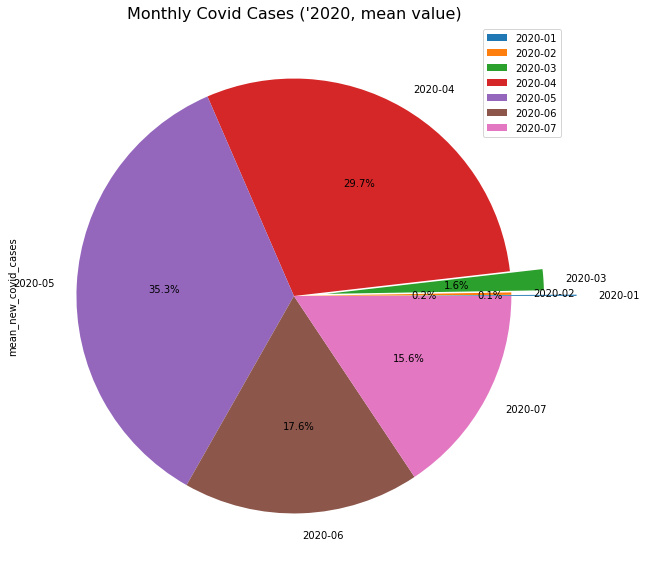

In [ ]:
# Params: x, explode, labels, colors, autopct, pctdistance, shadow, labeldistance, startangle, radius, counterclock, wedgeprops, textprops, center, frame, rotatelabels, normalize, data)
my_labels = list(clean_data.month)
my_explode = (0.3, 0, 0.15, 0, 0, 0, 0)
plot = clean_data.plot(kind='pie', y='mean_new_covid_cases', figsize=(10, 10), autopct='%0.1f%%', labels=my_labels, explode=my_explode)
my_plt.title("Monthly Covid Cases ('2020, mean value)", fontsize=16);

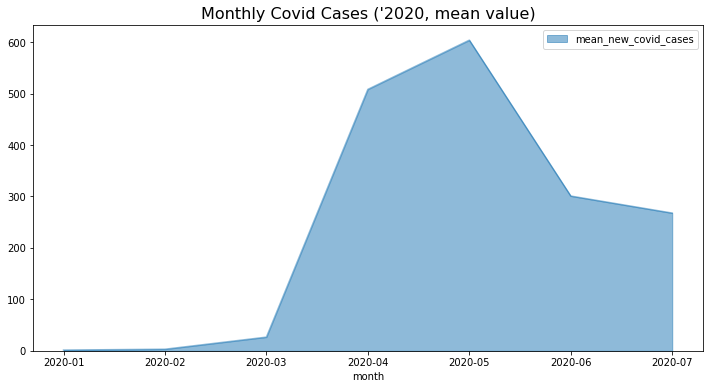

In [ ]:
clean_data_area = clean_data.loc[:][['month', 'mean_new_covid_cases']]
plot = clean_data_area.plot(kind='area', x='month', y='mean_new_covid_cases',figsize=(12,6), stacked=False)
my_plt.title("Monthly Covid Cases ('2020, mean value)", fontsize=16);

In [ ]:
#Convert object to float data types.
clean_data_converted = clean_data
for col in clean_data.columns:
  if 'month' in col:
    print(col) #ignore
  else:
    clean_data_converted[col] = clean_data[col].astype('float')
#end for

month


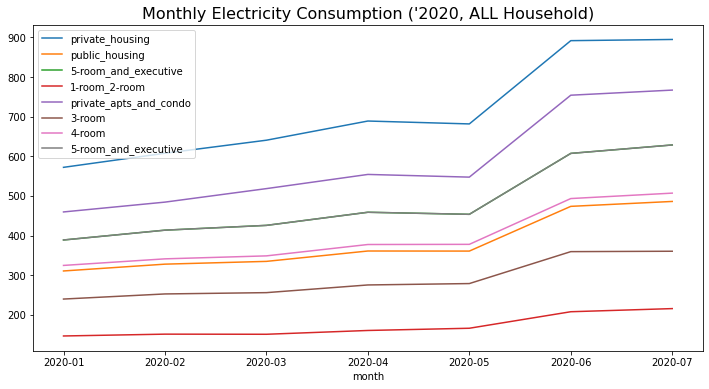

In [ ]:
clean_data_line = clean_data_converted.loc[:][['month', 'private_housing','public_housing','5-room_and_executive','1-room_2-room','private_apts_and_condo','3-room','4-room','5-room_and_executive']]
plot = clean_data_line.plot(kind='line', x='month', figsize=(12,6))
my_plt.title("Monthly Electricity Consumption ('2020, ALL Household)", fontsize=16);

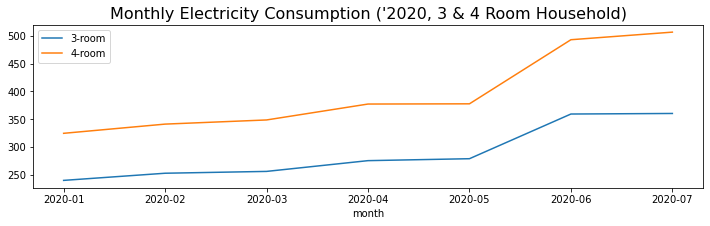

In [ ]:
clean_data_line = clean_data_converted.loc[:][['month', '3-room','4-room']]
plot = clean_data_line.plot(kind='line', x='month', figsize=(12,3))
my_plt.title("Monthly Electricity Consumption ('2020, 3 & 4 Room Household)", fontsize=16);

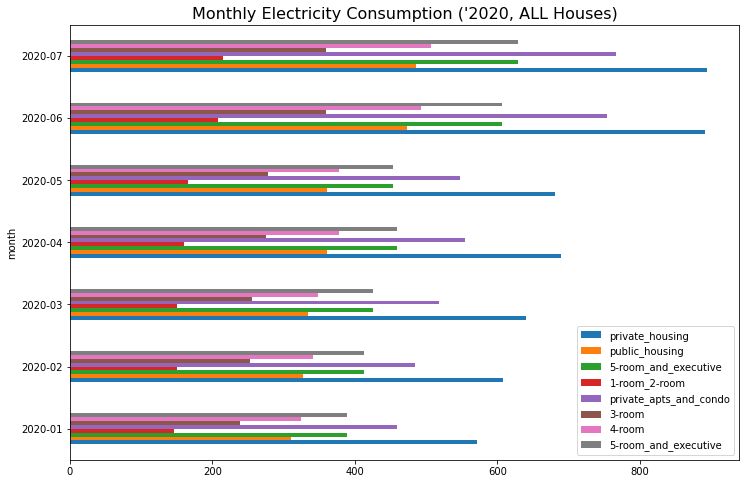

In [ ]:
clean_data_bivariate = clean_data_converted.loc[:][['month', 'private_housing','public_housing','5-room_and_executive','1-room_2-room','private_apts_and_condo','3-room','4-room','5-room_and_executive']]
clean_data_bivariate.plot(kind='barh', x='month', figsize=(12,8))
my_plt.title("Monthly Electricity Consumption ('2020, ALL Houses)", fontsize=16);

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9cd0742310>,
      dtype=object)

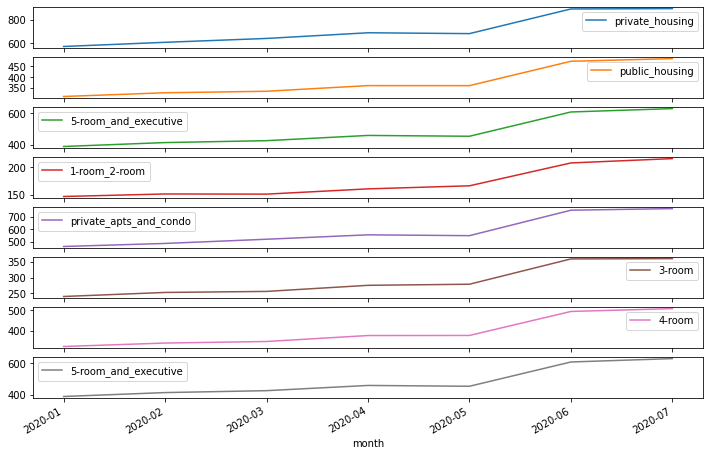

In [ ]:
clean_data_bivariate = clean_data_converted.loc[:][['month', 'private_housing','public_housing','5-room_and_executive','1-room_2-room','private_apts_and_condo','3-room','4-room','5-room_and_executive']]
clean_data_bivariate.plot(subplots=True, x='month', figsize=(12, 8))

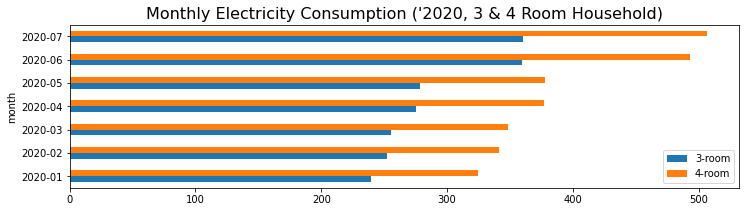

In [ ]:
clean_data_bivariate = clean_data_converted.loc[:][['month', '3-room','4-room']]
plot = clean_data_bivariate.plot(kind='barh', x='month', figsize=(12,3))
my_plt.title("Monthly Electricity Consumption ('2020, 3 & 4 Room Household)", fontsize=16);

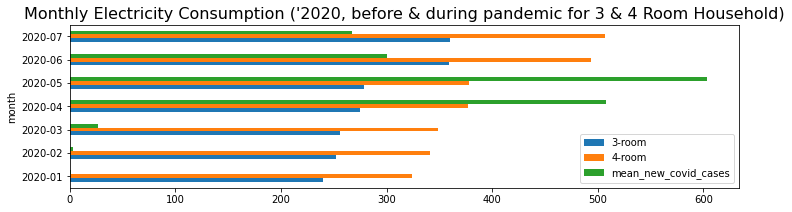

In [ ]:
clean_data_bivariate = clean_data_converted.loc[:][['month', '3-room','4-room', 'mean_new_covid_cases']]
plot = clean_data_bivariate.plot(kind='barh', x='month', figsize=(12,3))
my_plt.title("Monthly Electricity Consumption ('2020, before & during pandemic for 3 & 4 Room Household)", fontsize=16);

### Monthly Electricity & Covid Cases Correlation ('2020, before & during pandemic for 3 & 4 Room Household)

In [ ]:
clean_data_bivariate = clean_data_converted.loc[:][['month', '3-room','4-room', 'mean_new_covid_cases']]
clean_data_bivariate=clean_data_bivariate.rename(columns = {'mean_new_covid_cases':'new_cases'})
tb_corr = clean_data_bivariate.corr()
tb_corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,3-room,4-room,new_cases
3-room,1.000,0.999,0.352
4-room,0.999,1.000,0.342
new_cases,0.352,0.342,1.000


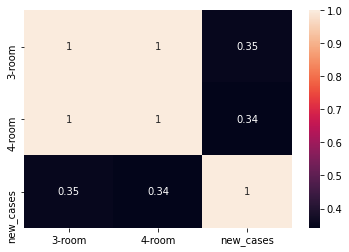

In [ ]:
import seaborn as sns

my_plt.figure(figsize=(6, 4))
sns.heatmap(clean_data_bivariate.corr(), annot=True, cbar=True)

**Time comparison**
In my testing, style.background_gradient() was 4x faster than Matplotlib.matshow() and 120x faster than seaborn.heatmap() with a 10x10 matrix. Unfortunately it doesn't scale as well as my_plt.matshow(): the two take about the same time for a 100x100 matrix, and Matplotlib.matshow() is 10x faster for a 1000x1000 matrix.

### **5. Discussion/Analysis**


   
1. Positive correlation between number of covid cases and electricty consumption as evidence by month over month data (bivariate analaysis) however, skewness was noted for June/July where increased electricity consumption but decreased in covid cases.

2. Expectations that electricity consumption will be higher during cb period (7 Apr to 31 May) however electricity cosnumption was higher during subsequent months where covid cases started declining. This negative correlation between covid cases June/July vs electricity consumption could be due to influence of another variable such as weather data. (multivariate analysis)..





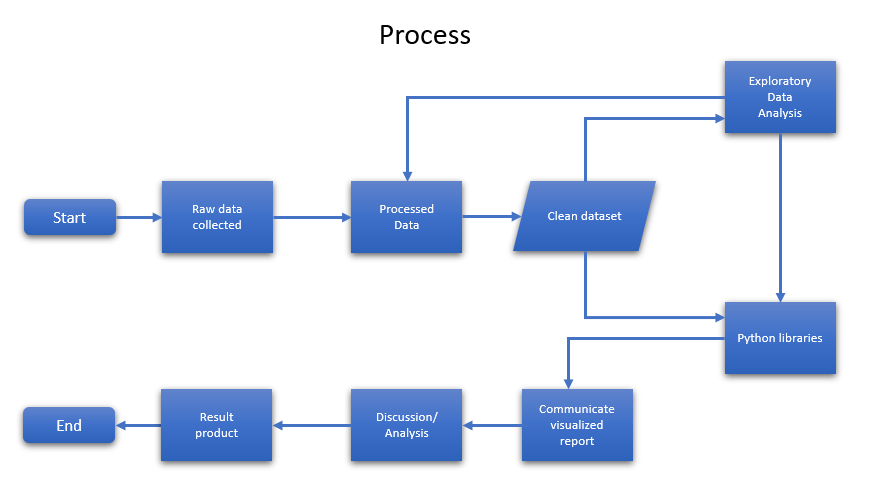

## References:

1. Natasha Meah (2021). "Singapore is in 'Phase 2 (heightened alert)' to curb Covid-19 spread. How is this different from past phases?" , TODAY, 14 May 2021. Available at:
https://www.todayonline.com/singapore/singapore-phase-2-heightened-alert-curb-covid-19-spread-how-different-past-phases (Accessed 15 May 2021). 

2. Energy Market Authority (2020), "Average Monthly Household Electrivty Consumption by Dwelling Type", viewed 15 May 2021. Available at: https://data.gov.sg/dataset/average-monthly-household-electricity-consumption-by-dwelling-type

3. Hannah Ritchie, Esteban Ortiz-Ospina, Diana Beltekian, Edouard Mathieu, Joe Hasell, Bobbie Macdonald, Charlie Giattino, Cameron Appel, Lucas Rodés-Guirao and Max Roser (2021), "Singapore: Coronavirus Pandemic Country Profile", viewed 15 May 2021. Available at: https://ourworldindata.org/coronavirus/country/singapore

4. National Environment Agency (2021), "Surface Air Temperature - Monthly Mean", viewed 18 May 2021. Available at: https://data.gov.sg/dataset/surface-air-temperature-monthly-mean

5. National Environment Agency (2021), "Relative Humidity - Monthly Mean", viewed 18 May 2021. Available at: https://data.gov.sg/dataset/relative-humidity-monthly-mean